#### Data Column Info
survival	Survival	0 = No, 1 = Yes;
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd;
sex	Sex;	
Age	Age in years;	
sibsp	# of siblings / spouses aboard the Titanic;	
parch	# of parents / children aboard the Titanic;	
ticket	Ticket number;	
fare	Passenger fare;	
cabin	Cabin number;	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### import dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### load dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/GauriPaithankar/Datasets/main/titanic.csv")

### data exploration

In [3]:
df.shape

(891, 12)

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### check null values and replace null values

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [9]:
df['Embarked'].fillna('S', inplace = True)

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

### drop cabin (so many null values), name, passengerid columns

In [12]:
df.drop(['Cabin', 'PassengerId', 'Name'], axis=1, inplace=True)

In [13]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C


In [14]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [15]:
df['Age'].mean()

29.69911764705882

### replace null values with mean

In [16]:
df.fillna(df['Age'].mean(), inplace=True)

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [18]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C


### round off float value

In [19]:
df.Age.apply(np.round)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### change datatype

In [20]:
type('Age')

str

In [21]:
df['Age'].astype(int)

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int32

### handling duplicate values

In [22]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [23]:
df.duplicated().sum()

15

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

0

In [26]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C


### drop ticket, fare columns

In [27]:
df.drop(['Ticket', 'Fare'], axis = 1, inplace = True)

In [28]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C


### label encoding for sex & embared column

In [29]:
from sklearn import preprocessing 

In [30]:
 label_encoder = preprocessing.LabelEncoder() 

In [31]:
df['Sex']= label_encoder.fit_transform(df['Sex']) 

In [32]:
df['Sex'].unique() 

array([1, 0])

In [33]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C


In [34]:
df['Embarked'].unique() 

array(['S', 'C', 'Q'], dtype=object)

In [35]:
df['Embarked']= label_encoder.fit_transform(df['Embarked']) 

In [36]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.00000
mean,0.383562,2.301370,0.649543,29.736044,0.474886,0.372146,1.53653
std,0.486531,0.837983,0.477386,13.074713,0.946843,0.801912,0.79126
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,1.00000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,2.00000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,2.00000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.00000


### checking correlation

<Axes: >

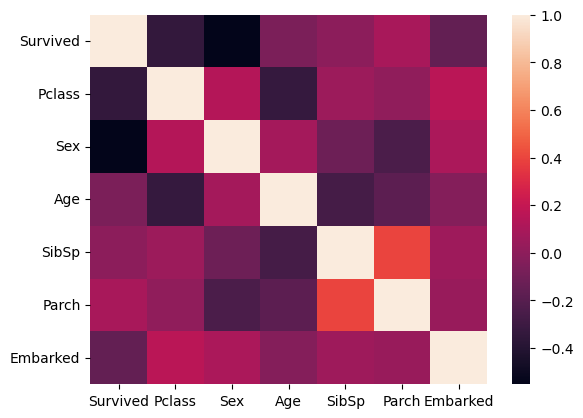

In [37]:
sns.heatmap(df.corr())

### checking outlier

<Axes: >

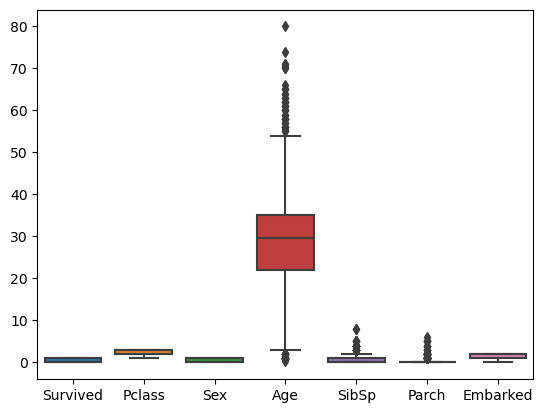

In [38]:
sns.boxplot(df)

<Axes: xlabel='Sex'>

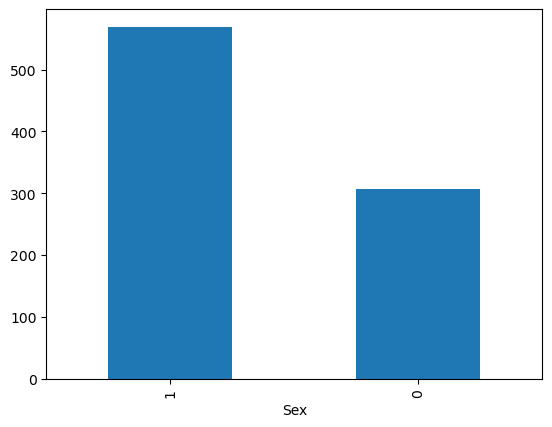

In [39]:
df['Sex'].value_counts().plot(kind='bar')

(array([ 99., 509., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

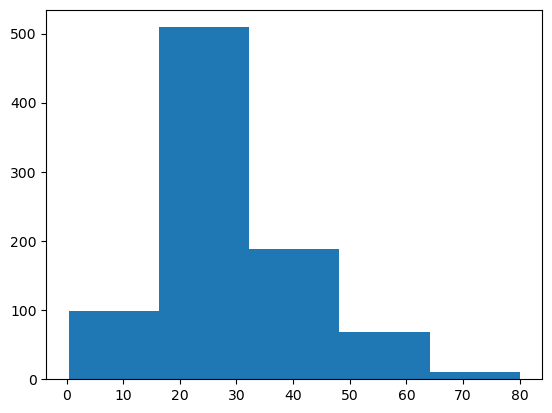

In [40]:
plt.hist(df['Age'],bins=5)

<Axes: xlabel='Survived', ylabel='Density'>

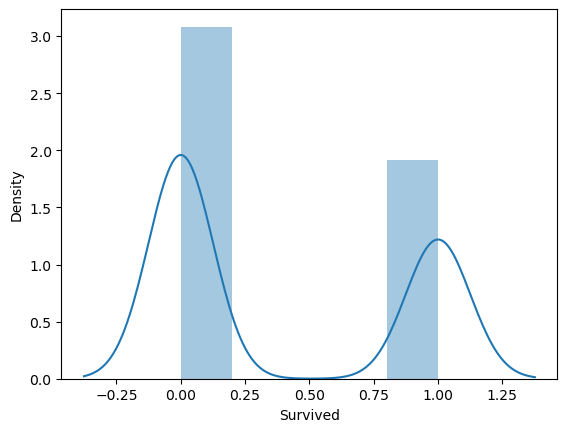

In [41]:
sns.distplot(df['Survived'])

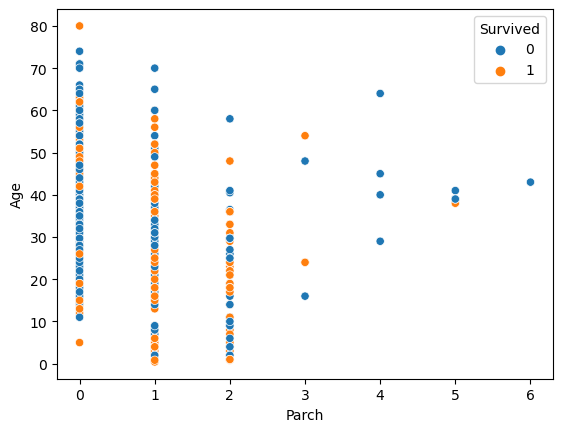

In [42]:
sns.scatterplot(x='Parch', y='Age', hue='Survived',data=df)
plt.show()

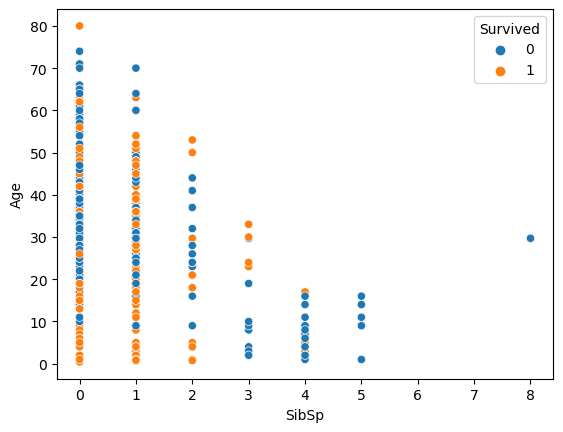

In [43]:
sns.scatterplot(x='SibSp', y='Age', hue='Survived',data=df)
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

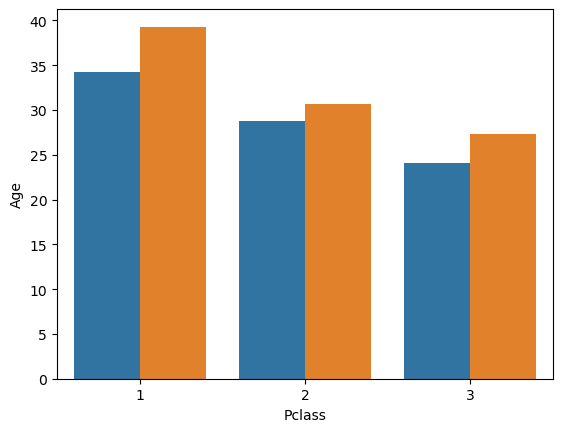

In [44]:
sns.barplot(x='Pclass', y='Age', hue='Sex', data=df, ci=None)
plt.title('Average Age by Pclass and Sex')
plt.show()

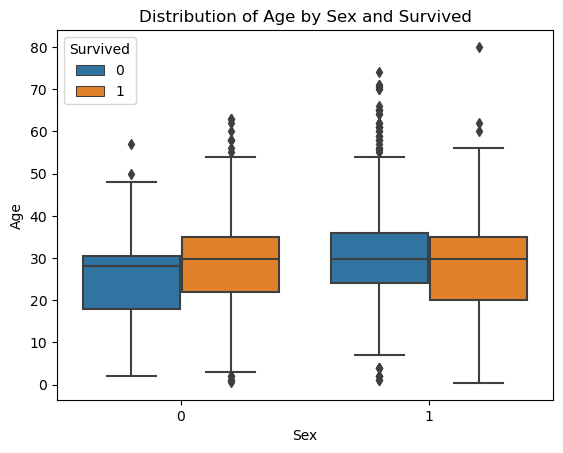

In [45]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df)
plt.title('Distribution of Age by Sex and Survived')
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

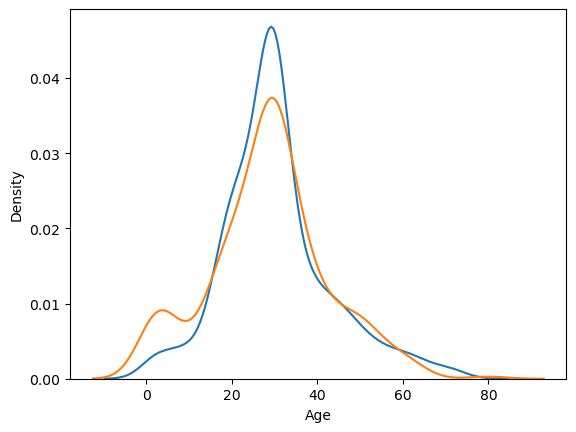

In [46]:
sns.distplot(df[df['Survived']==0]['Age'],hist=False)
sns.distplot(df[df['Survived']==1]['Age'],hist=False)

<Axes: xlabel='Survived', ylabel='Pclass'>

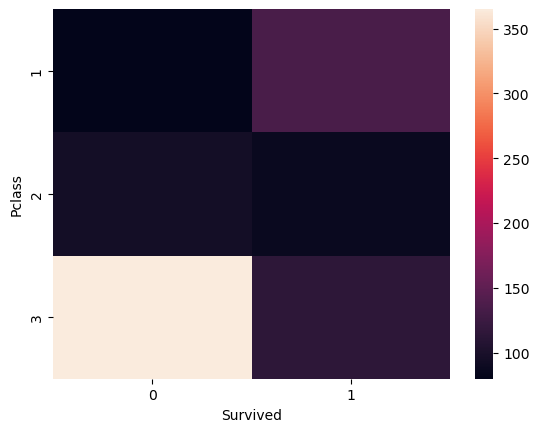

In [47]:
sns.heatmap(pd.crosstab(df['Pclass'],df['Survived']))

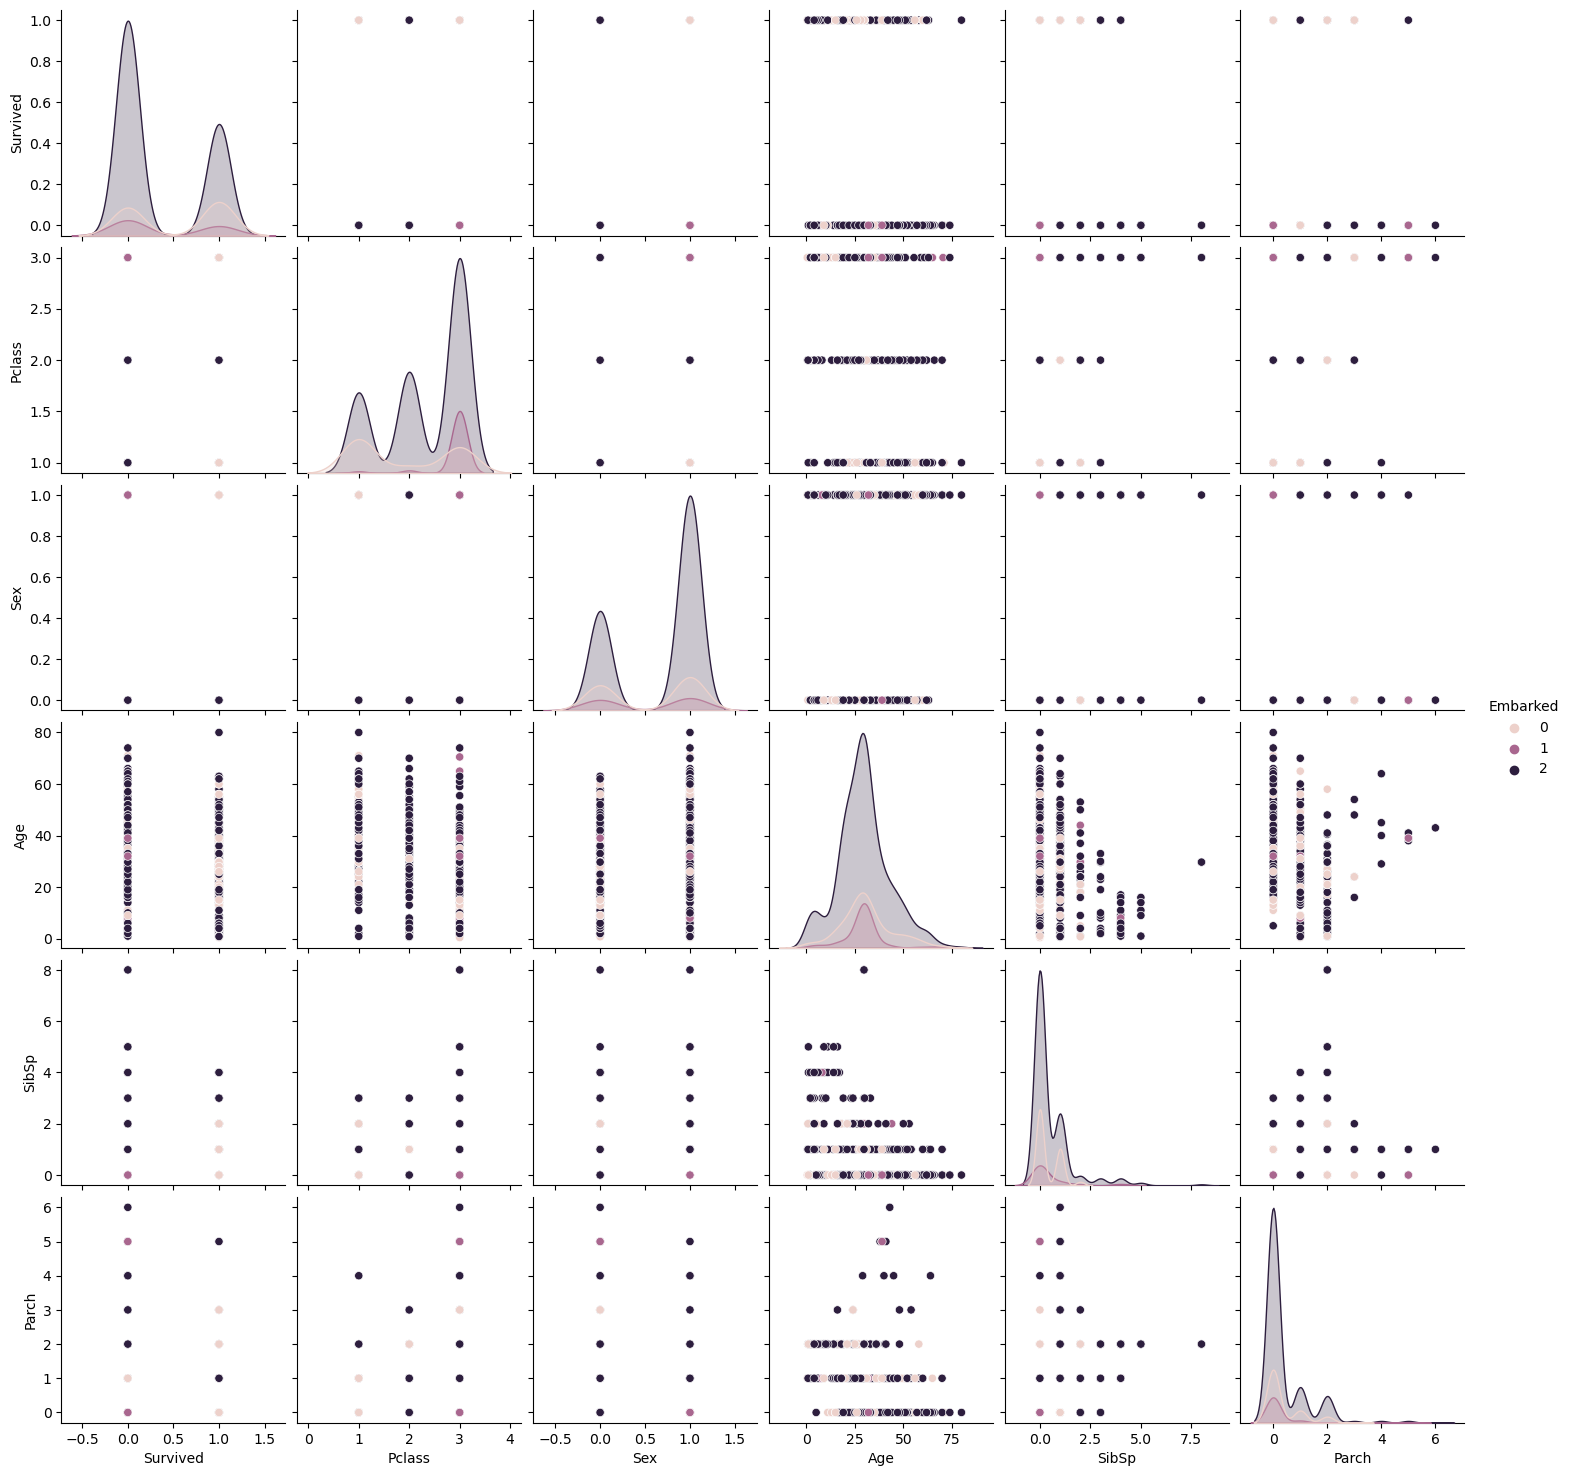

In [49]:
sns.pairplot(df,hue='Embarked')